<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [111]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
#import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season

### Load Data From CSV File  

Let's load the dataset [NB Need to provide link to csv file]

In [112]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [113]:
df.shape

(1406, 24)

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 

In [114]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing



Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.

In [115]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [116]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


In [117]:
df1["YEAR"].value_counts()

2019    14
2018    14
2017    14
2016    14
Name: YEAR, dtype: int64

Lets plot some columns to underestand data better:

In [29]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt



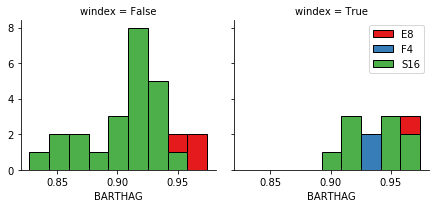

In [118]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

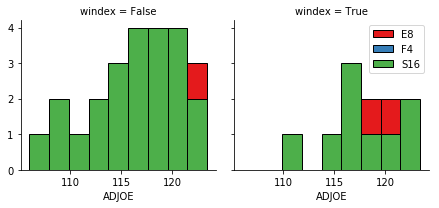

In [119]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at how Adjusted Defense Efficiency plots

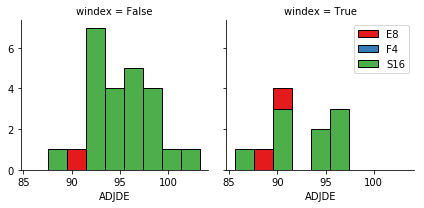

In [120]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()

We see that this data point doesn't impact the ability of a team to get into the Final Four. 

## Convert Categorical features to numerical values

Lets look at the postseason:

In [121]:
df1.groupby('windex')["POSTSEASON"].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [122]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection

Lets define feature sets, X:

In [123]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|

In [124]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [125]:
X_std = preprocessing.StandardScaler().fit_transform(X)
X_std[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation 

Split the data into Training and Validation data.

In [126]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

You can use <code> accuracy_score</cdoe>

In [127]:
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
yhat = neigh.predict(X_val)
#print(yhat[0:5])

f1_KNN = metrics.f1_score(y_val, yhat, average="weighted")
print("F1-score: %.3f" % f1_KNN)
Acc_KNN = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc_KNN)

F1-score: 0.678
Accuracy: 0.667


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k the on the validation data:

.3f


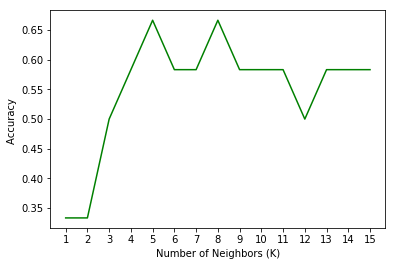

In [128]:
Ks = 15
acc = np.zeros(Ks)

for n in range(1, Ks+1):
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train, y_train)
    yhat=neigh.predict(X_val)
    acc[n-1] = metrics.accuracy_score(y_val, yhat)
print(".3f" %acc)

plt.plot(range(1, Ks+1), acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(range(1, Ks+1))
plt.show()

In [131]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)
yhat=neigh.predict(X_val)
Acc = metrics.accuracy_score(y_val, yhat)
print("Accuracy = %.3f" % Acc)

Accuracy = 0.667


# Decision Tree

The following lines of code fit a <code>DecisionTreeClassifier</code>:

In [132]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 

[0.66666667 0.66666667 0.5        0.33333333 0.41666667 0.41666667
 0.41666667 0.41666667 0.41666667 0.5        0.41666667 0.5
 0.5        0.5        0.5        0.41666667 0.41666667 0.41666667
 0.41666667 0.5        0.5       ]


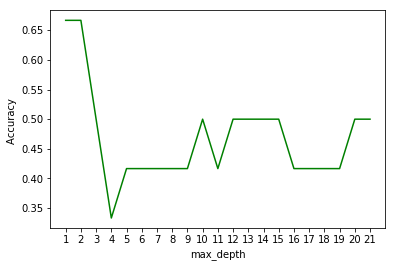

In [133]:
Ks = 21
acc = np.zeros(Ks)

for n in range(1, Ks+1):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    drugTree.fit(X_train, y_train)
    yhat=drugTree.predict(X_val)
    acc[n-1] = metrics.accuracy_score(y_val, yhat)
print(acc)

plt.plot(range(1, Ks+1), acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('max_depth')
plt.xticks(range(1, Ks+1))
plt.show()

In [134]:
%%capture
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

Accuracy: 0.667


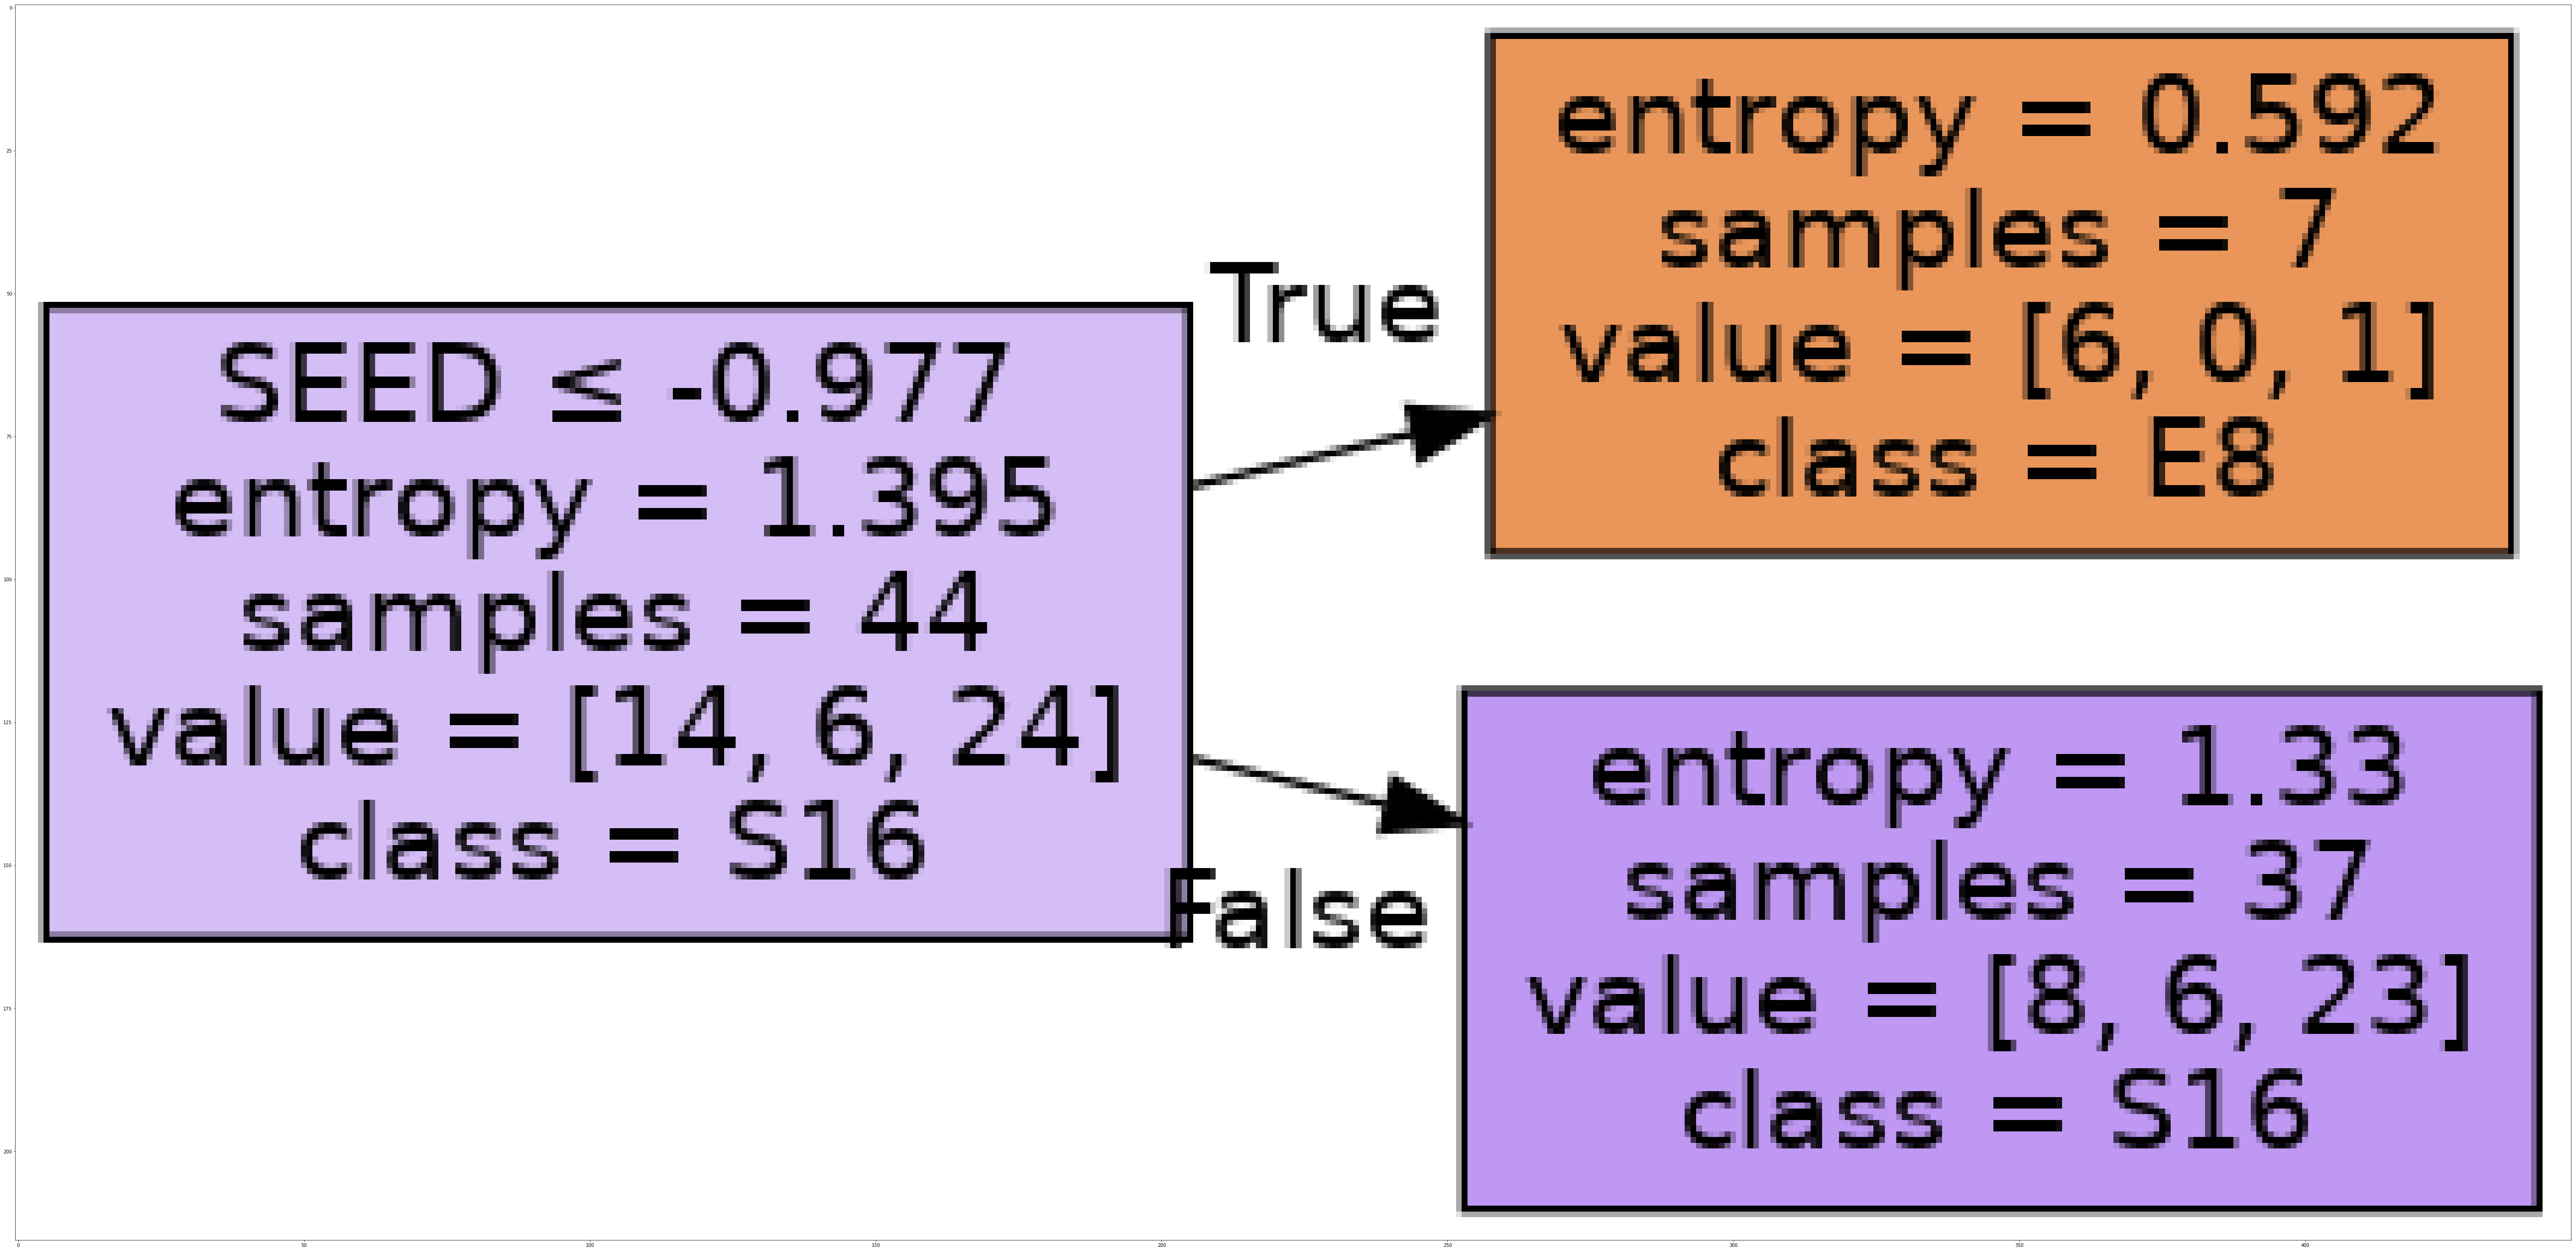

In [135]:
max_depth = 1
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
drugTree.fit(X_train, y_train)
yhat=drugTree.predict(X_val)
Acc_DT = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc_DT)

dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns
targetNames = df1['POSTSEASON'].unique().tolist()
out=tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True, special_characters=True, rotate=True) #Creates the Dot data and stores it in dot_data object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #Load graph as defined by data in DOT format (dot_data.getvalue()) into a Dot class
graph.write_png(filename) # Gives the name of the file to graph.
img = mpimg.imread(filename) #Read an image file (calling it by its filename) into an array (the argument admits the file, the URL, or the filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest') #Display data as an image

# Support Vector Machine

<b>Question  4</b>Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [136]:
from sklearn import svm

In [137]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
dict = {}
max_i = 0
for i, ker in enumerate(kernel):
    svo = svm.SVC(kernel=ker)
    svo.fit(X_train, y_train)
    yhat = svo.predict(X_val)
    Acc = metrics.accuracy_score(y_val, yhat)
    print("Accuracy with", ker, ": %.3f" % Acc)
    dict[ker] = Acc 
    if Acc >= max(dict.values()):
        max_i = i
print("\nBest kernel:", kernel[max_i])

Accuracy with linear : 0.250
Accuracy with poly : 0.667
Accuracy with rbf : 0.583
Accuracy with sigmoid : 0.500

Best kernel: poly


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [138]:
svo = svm.SVC(kernel= kernel[max_i])
svo.fit(X_train, y_train)
yhat = svo.predict(X_val)

#J_SVM = metrics.jaccard_similarity_score(y_val, yhat)
#print("Jaccard Index: %.3f" % J_SVM)
#f1_SVM = metrics.f1_score(y_val, yhat, average="micro")
#print("F1-score: %.3f" % f1_SVM)
Acc = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc)

Accuracy: 0.667


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression

<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)

In [139]:
from sklearn.linear_model import LogisticRegression

In [154]:
#valid solver values {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
dict = {}
max_i = 0
for i, sol in enumerate(solver):
    LR = LogisticRegression(C=0.01, solver=sol)
    LR.fit(X_train, y_train)
    yhat = LR.predict(X_val)
    Acc = metrics.accuracy_score(y_val, yhat)
    print("Accuracy with", sol, ": %.3f" % Acc)
    dict[sol] = Acc
    if Acc >= max(dict.values()):
        max_i = i
print("\nBest solver method:", solver[max_i])

Accuracy with newton-cg : 0.667
Accuracy with lbfgs : 0.667
Accuracy with liblinear : 0.583
Accuracy with sag : 0.667
Accuracy with saga : 0.667

Best solver method: saga


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarni

In [160]:
LR = LogisticRegression(C=0.01, solver="saga")
LR.fit(X_train, y_train)
yhat = LR.predict(X_val)
display(set(y_val)) # Get the labels in same order as probability values
yhat_prob = LR.predict_proba(X_val)

#print(yhat_prob[0:5])
Acc = metrics.accuracy_score(y_val, yhat)
print("\nAccuracy: %.3f" % Acc)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'E8', 'F4', 'S16'}


Accuracy: 0.667


# Model Evaluation using Test set

In [141]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [142]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  6</b> Calculate the  F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**

### Load Test set for evaluation 

In [143]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()
test_df.shape

(1757, 24)

In [144]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:1]

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[-0.40807445, -1.10135297,  0.33736593,  2.66479976, -2.46831661,
         0.21370325,  0.94409055, -1.19216365, -1.64348924,  0.0145406 ,
         1.29523097, -0.62353318, -0.93178856,  0.14278437,  0.1688762 ,
         0.28450084,  1.62625961, -0.83664926, -0.99850054,  0.48431917,
        -0.6770032 ]])

In [145]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

KNN

In [193]:
yhat = neigh.predict(test_X)

print("KNN")
Acc = metrics.accuracy_score(test_y, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, test_y)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(test_y, yhat, average="micro")
print("F1-score: %.6f" % f1)

Results = list(range(4))
Results[0] = ["KNN", Acc, Jaccard, f1]

KNN
Accuracy: 0.628571
Jaccard: 0.458333
F1-score: 0.628571


Decision Tree

In [201]:
yhat = drugTree.predict(test_X)

print("Decision Tree")
Acc = metrics.accuracy_score(test_y, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, test_y)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(test_y, yhat, average="micro")
print("F1-score: %.6f" % f1)

Results[1] = ["Decision Tree", Acc, Jaccard, f1]

Decision Tree
Accuracy: 0.642857
Jaccard: 0.473684
F1-score: 0.642857


SVM

In [195]:
yhat = svo.predict(test_X)

print("Support Vector Machine")
Acc = metrics.accuracy_score(test_y, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, test_y)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(test_y, yhat, average="micro")
print("F1-score: %.6f" % f1)

Results[2] = ["SVM", Acc, Jaccard, f1]

Support Vector Machine
Accuracy: 0.685714
Jaccard: 0.521739
F1-score: 0.685714


Logistic Regression

In [199]:
yhat = LR.predict(test_X)
yhat_prob = LR.predict_proba(test_X)

print("Logistic Regression")
Acc = metrics.accuracy_score(test_y, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, test_y)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(test_y, yhat, average="micro")
print("F1-score: %.6f" % f1)
Logloss = metrics.log_loss(test_y, yhat_prob)
print("LogLoss: %.6f" % Logloss)

Results[3] = ["LogisticRegression", Acc, Jaccard, f1, Logloss]

Logistic Regression
Accuracy: 0.571429
Jaccard: 0.400000
F1-score: 0.571429
LogLoss: 0.901142


In [202]:
Report = pd.DataFrame(Results, columns=["Algorithm", "Accuracy", "Jaccard", "F1-score", "LogLoss"])
Report

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.628571,0.458333,0.628571,NaN
1,Decision Tree,0.642857,0.473684,0.642857,NaN
2,SVM,0.685714,0.521739,0.685714,NaN
3,LogisticRegression,0.571429,0.400000,0.571429,0.901142


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                |0.628571  | 0.458333 | 0.628571  | NA      |
| Decision Tree      |0.642857  | 0.473684 | 0.642857  | NA      |
| SVM                |0.685714  | 0.521739 | 0.685714  | NA      |
| LogisticRegression |0.685714  | 0.521739 | 0.685714  | 1.03719 |

Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Authors: <a href="https://www.linkedin.com/in/azim-hirjani-691a07179/">Azim Hirjani</a> and <a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a></h4>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.



<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>